# **Libraries**

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

# **Import EMG Feature (CSV file)**

In [5]:
df = pd.read_csv(r"C:\Users\hpalm\Desktop\Programacion\Proyecto_de_grado\Codigo_caracteristicas\Features_EMG_P01.csv")

In [6]:
df

,EMAV,EWL,MAV,WL,ZC,SSC,RMS,AAC,DASDV,LD,MMAV,MMAV2,MYOP,SSI,VAR,WAMP,MFL,Label
0,0.000569,0.206534,0.000002,0.000515,99,0,0.000002,1.031368e-06,0.000001,0.002665,0.000001,0.000001,1.726,2.165863e-09,4.331534e-12,0,-4.514744,0
1,0.000616,0.216262,0.000002,0.000583,93,2,0.000003,1.167507e-06,0.000002,0.002852,0.000002,0.000002,0.858,3.278680e-09,6.551368e-12,423,-4.417534,0
2,0.000613,0.228495,0.000002,0.000615,99,7,0.000002,1.232243e-06,0.000002,0.002759,0.000001,0.000001,0.000,3.057061e-09,6.105849e-12,1312,-4.386639,0
3,0.000661,0.227736,0.000004,0.000957,105,7,0.000008,1.917174e-06,0.000004,0.003204,0.000003,0.000003,1.750,3.457190e-08,6.914370e-11,830,-4.001613,0
4,0.000549,0.225940,0.000002,0.000620,124,0,0.000002,1.242128e-06,0.000002,0.002732,0.000001,0.000001,0.464,2.838227e-09,5.615190e-12,0,-4.441027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.000646,0.215896,0.000002,0.000492,77,0,0.000003,9.862513e-07,0.000001,0.002782,0.000002,0.000002,0.000,3.518607e-09,6.979933e-12,0,-4.565234,5
10196,0.000629,0.202249,0.000002,0.000497,73,0,0.000003,9.957700e-07,0.000001,0.002958,0.000002,0.000002,0.000,3.407885e-09,6.811655e-12,0,-4.553725,5
10197,0.000752,0.228741,0.000003,0.000644,64,0,0.000004,1.289650e-06,0.000002,0.003252,0.000002,0.000002,0.000,7.816880e-09,1.558520e-11,0,-4.441204,5
10198,0.000663,0.197919,0.000002,0.000448,64,0,0.000003,8.981024e-07,0.000001,0.002994,0.000002,0.000002,0.730,4.168233e-09,8.330965e-12,0,-4.600838,5


# **Correlation matrix between the 17 features**

In [9]:
cols = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','WAMP','MFL']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,17)].values)

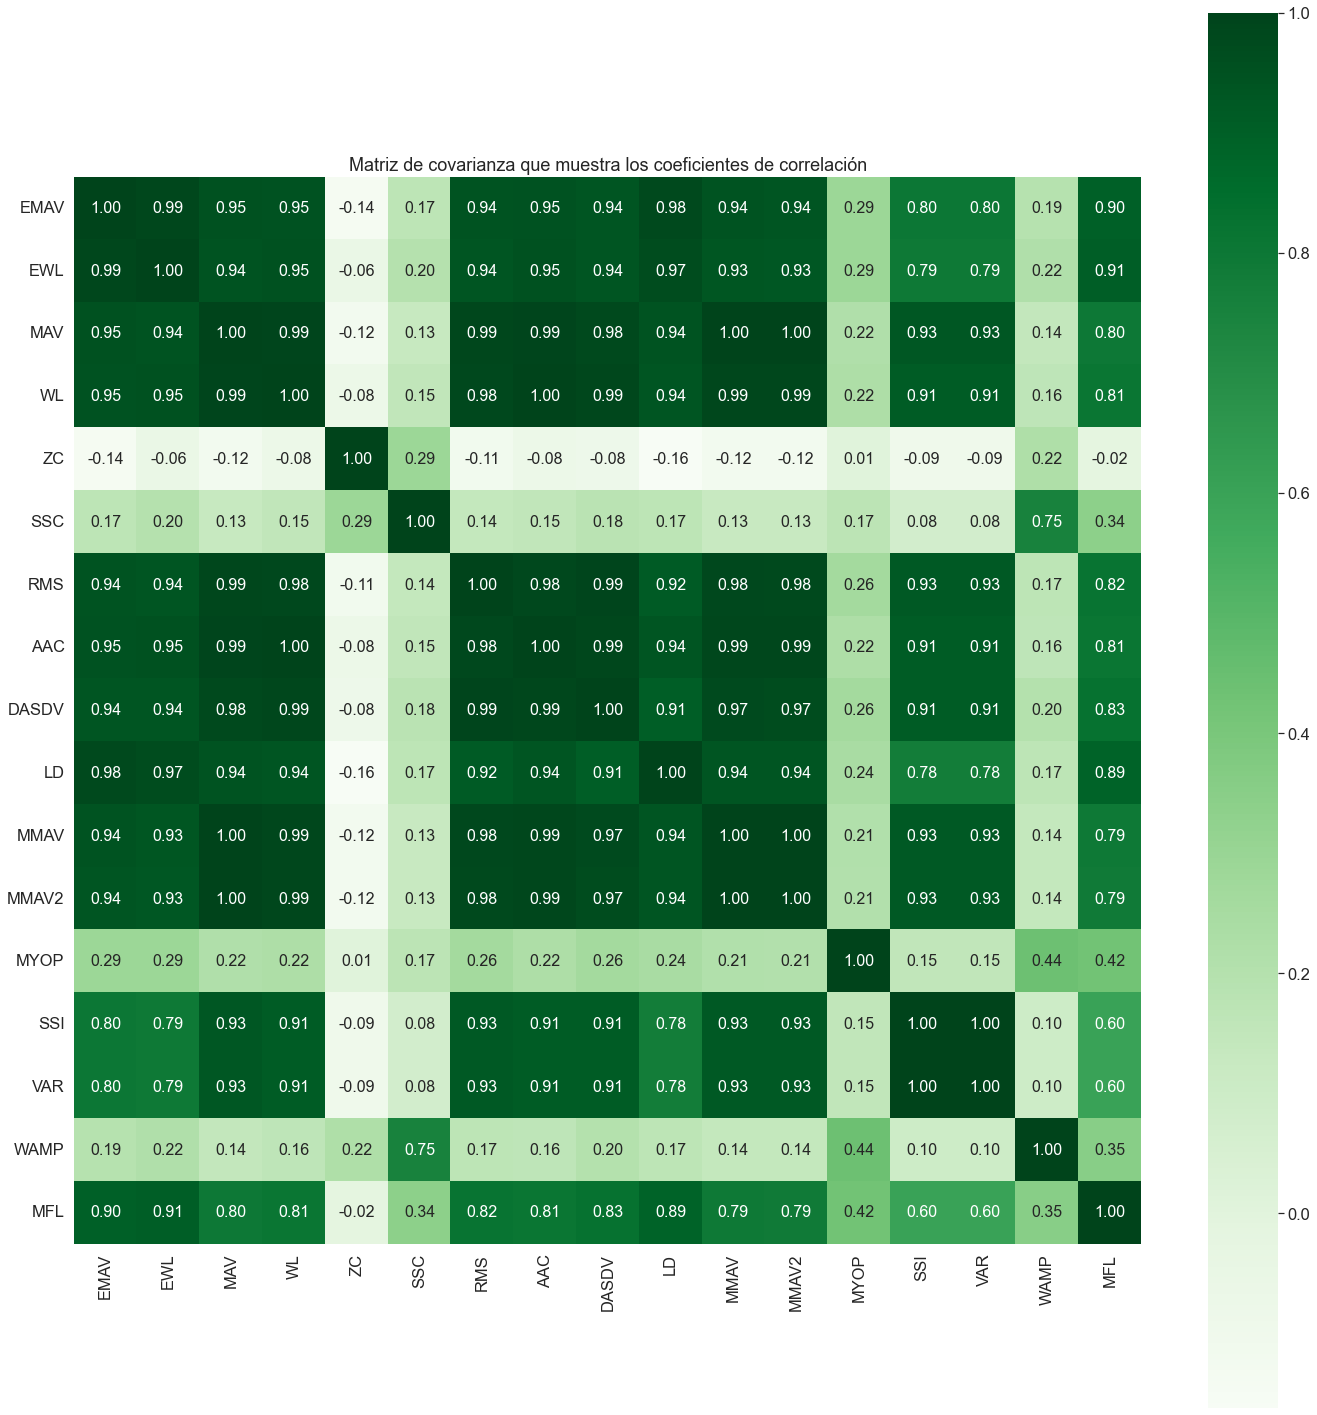

In [10]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=cols,
                 xticklabels=cols,
                 cmap="Greens")

plt.title('Matriz de covarianza que muestra los coeficientes de correlación')
plt.tight_layout()
plt.show()

In [11]:
# choose 5 feature to train according to the correlation matrix

cols_selected = ['MAV', 'ZC', 'SSC','MYOP','WAMP']

In [12]:
df[cols_selected].head()

,MAV,ZC,SSC,MYOP,WAMP
0,0.000002,99,0,1.726,0
1,0.000002,93,2,0.858,423
2,0.000002,99,7,0.000,1312
3,0.000004,105,7,1.750,830
4,0.000002,124,0,0.464,0


# **Train and Test set**

In [13]:
X = df.iloc[:,[2,4,5,12,15]].values    # features matrix 
y = df.iloc[:,[17]].values        # target variable

In [29]:
# Split data into train, test and validatio sets 

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=0, stratify=y)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,test_size=0.2,random_state=0, stratify=y_train)

print('Testing data shape : ', X_test.shape, y_test.shape)
print('Training data shape : ', X_train.shape, y_train.shape)
print('validation data shape : ', X_val.shape, y_val.shape)

Testing data shape :  (2040, 5) (2040, 1)
Training data shape :  (6528, 5) (6528, 1)
validation data shape :  (1632, 5) (1632, 1)


# **Build ANN and train**

In [31]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape = (5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 4,934
Trainable params: 4,934
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [37]:
# train the ANN model
model_train = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_val,y_val)) 

Epoch 1/100
204/204 [==============================] - 0s 2ms/step - loss: 1.4382 - accuracy: 0.3506 - val_loss: 1.4431 - val_accuracy: 0.3438
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 1.4374 - accuracy: 0.3542 - val_loss: 1.4396 - val_accuracy: 0.3425
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 1.4383 - accuracy: 0.3430 - val_loss: 1.4523 - val_accuracy: 0.3468
Epoch 4/100
204/204 [==============================] - 0s 1ms/step - loss: 1.4390 - accuracy: 0.3514 - val_loss: 1.4525 - val_accuracy: 0.3438
Epoch 5/100
204/204 [==============================] - 0s 1ms/step - loss: 1.4372 - accuracy: 0.3543 - val_loss: 1.4441 - val_accuracy: 0.3438
Epoch 6/100
204/204 [==============================] - 0s 1ms/step - loss: 1.4379 - accuracy: 0.3529 - val_loss: 1.4484 - val_accuracy: 0.3431
Epoch 7/100
204/204 [==============================] - 0s 1ms/step - loss: 1.4362 - accuracy: 0.3499 - val_loss: 1.4635 - val_accuracy: 0.3456

In [43]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1])) 

Train loss: 1.414692997932434, Train accuracy: 0.3578431308269501
Test loss: 1.4329590797424316, Test accuracy: 0.34019607305526733
